In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
stars = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Stars.csv')

In [3]:
stars.head(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


In [4]:
index = stars.index
index.name = 'Index'

In [5]:
stars.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
Index,,,,,,,
0,3068,0.0024,0.1700,16.12,Red,M,0
1,3042,0.0005,0.1542,16.60,Red,M,0
2,2600,0.0003,0.1020,18.70,Red,M,0


In [6]:
stars.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [7]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [8]:
stars.isna().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [9]:
stars.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [10]:
stars.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Temperature    1.321568
L              2.068069
R              1.946800
A_M           -0.121540
Type           0.000000
dtype: float64

In [11]:
stars.duplicated().sum()

0

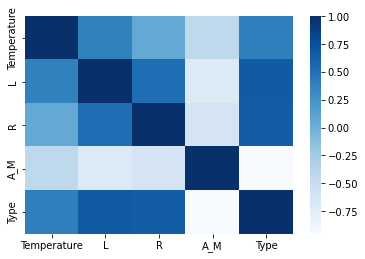

In [12]:
sns.heatmap(stars.corr(), 
            cmap = 'Blues')

In [13]:
stars.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [14]:
for i in ['Color', 'Spectral_Class', 'Type']:
  print("\n",i, " --->\n", stars[i].unique())
  print("\n",i, " --->\n", stars[i].value_counts())


 Color  --->
 ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']

 Color  --->
 Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

 Spectral_Class  --->
 ['M' 'B' 'A' 'F' 'O' 'K' 'G']

 Spectral_Class  --->
 M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

 Type  --->
 [0 1 2 3 4 5]

 Type  --->
 0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64


In [15]:
stars['Color'] = stars['Color'].replace('Orange-Red', 'Red')
stars['Color'] = stars['Color'].replace('Pale yellow orange', 'Orange')
stars['Color'] = stars['Color'].replace('Blue White', 'Blue-White')
stars['Color'] = stars['Color'].replace('Blue white', 'Blue-White')
stars['Color'] = stars['Color'].replace('Blue-white', 'Blue-White')
stars['Color'] = stars['Color'].replace('Whitish', 'White')
stars['Color'] = stars['Color'].replace('white', 'White')
stars['Color'] = stars['Color'].replace('yellow-white', 'White-Yellow')
stars['Color'] = stars['Color'].replace('Yellowish White', 'White-Yellow')
stars['Color'] = stars['Color'].replace('yellowish', 'White-Yellow')
stars['Color'] = stars['Color'].replace('Yellowish', 'White-Yellow')  

for i in ['Color', 'Spectral_Class', 'Type']:
  print("\n",i, " --->\n", stars[i].unique())
  print("\n",i, " --->\n", stars[i].value_counts())


 Color  --->
 ['Red' 'Blue-White' 'White' 'White-Yellow' 'Orange' 'Blue']

 Color  --->
 Red             113
Blue             56
Blue-White       41
White-Yellow     15
White            12
Orange            3
Name: Color, dtype: int64

 Spectral_Class  --->
 ['M' 'B' 'A' 'F' 'O' 'K' 'G']

 Spectral_Class  --->
 M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

 Type  --->
 [0 1 2 3 4 5]

 Type  --->
 0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64


In [16]:
fig = px.histogram(stars, 'Temperature',             
                   color='Color',
                   title="<b>Average Temparature by color</b>")

fig.add_vline(x=stars['Temperature'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

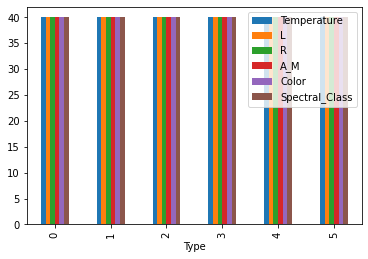

In [17]:
#balanced data
stars.groupby('Type').count().plot(kind = 'bar')

Text(0, 0.5, 'Frequency')

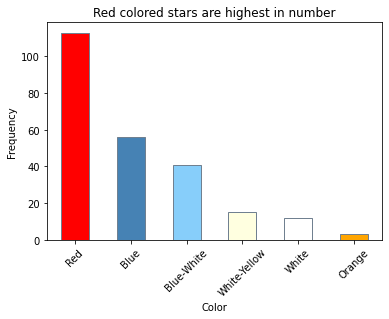

In [18]:
#plotting colors by frequencies
color = ['Red', 'SteelBlue', 'lightskyblue', 'lightyellow', 'White', 'Orange']
stars['Color'].value_counts().plot(kind = 'bar', color = color, edgecolor = 'slategray')
plt.xticks(rotation = 45)
plt.title('Red colored stars are highest in number')
plt.xlabel('Color')
plt.ylabel('Frequency')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

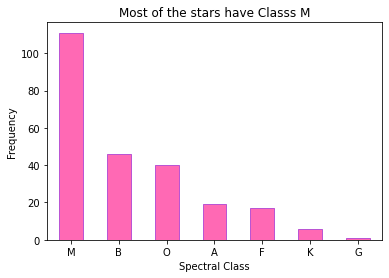

In [19]:
stars['Spectral_Class'].value_counts().plot(kind = 'bar', color = 'hotpink', edgecolor = 'mediumorchid')
plt.title('Most of the stars have Classs M')
plt.xlabel('Spectral Class')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)

In [20]:
#Most of the stars have luminosity close to 25k with blue stars having highest number of luminous stars
fig = px.histogram(stars, 'L',             
                   color='Color',
                   title="<b>Average Luminosity by color</b>")

fig.add_vline(x=stars['L'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

In [21]:
#Most of the stars have small relative radius close to 100 with blue stars having highest number of larger stars
fig = px.histogram(stars, 'R',             
                   color='Color',
                   title="<b>Average Relative Radius by color</b>")

fig.add_vline(x=stars['R'].mean(), line_width=2, line_dash="dash", line_color="black")

fig.show()

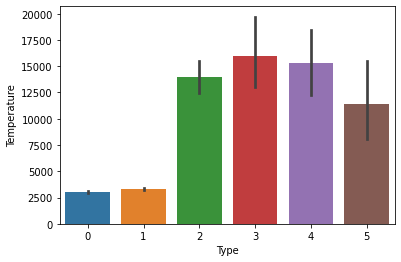

In [22]:
sns.barplot(data = stars, x = 'Type', y = 'Temperature')

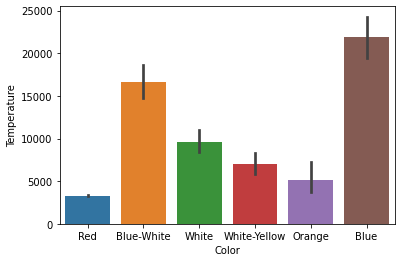

In [23]:
sns.barplot(data = stars, x = 'Color', y = 'Temperature')

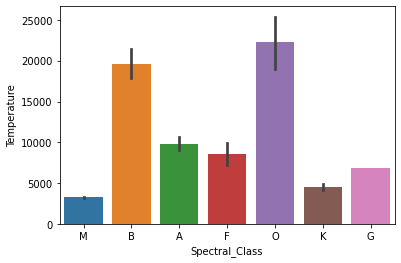

In [24]:
sns.barplot(data = stars, x = 'Spectral_Class', y = 'Temperature')

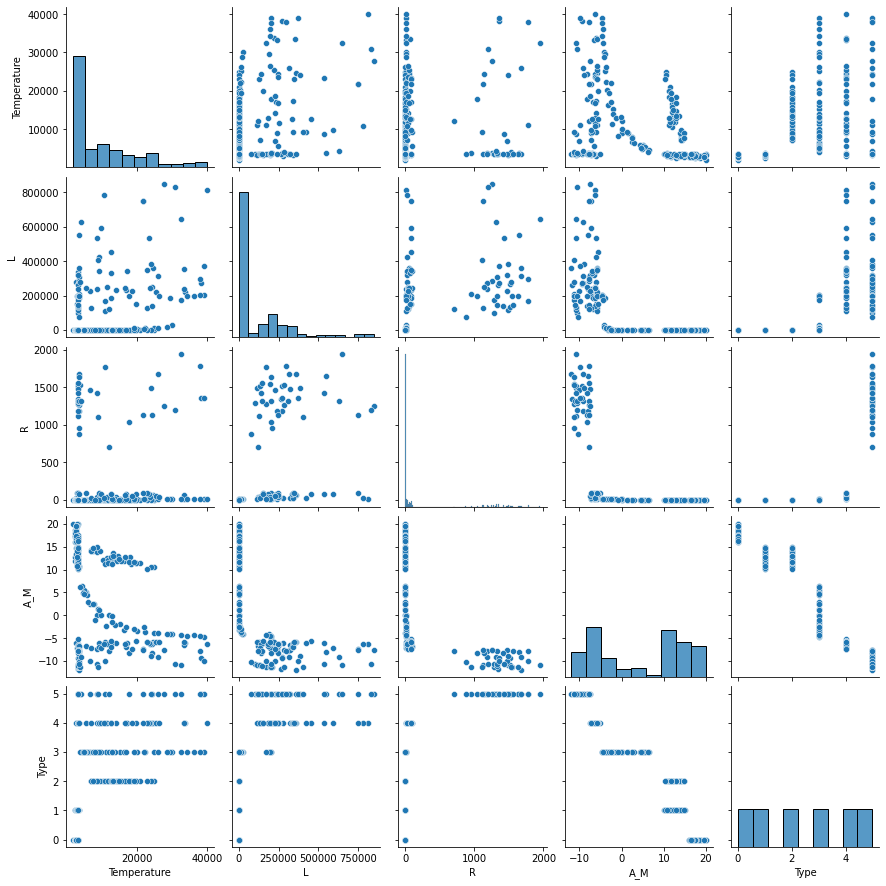

In [25]:
#doesn't show much
sns.pairplot(stars)

In [26]:
stars_type_0 = stars[stars['Type'] == 0]
stars_type_1 = stars[stars['Type'] == 1]
stars_type_2 = stars[stars['Type'] == 2]
stars_type_3 = stars[stars['Type'] == 3]
stars_type_4 = stars[stars['Type'] == 4]
stars_type_5 = stars[stars['Type'] == 5]

star_type_df = [stars_type_0, stars_type_1, stars_type_2, stars_type_3, stars_type_4, stars_type_5]
star_type_names_df = ['0', '1', '2', '3', '4', '5']

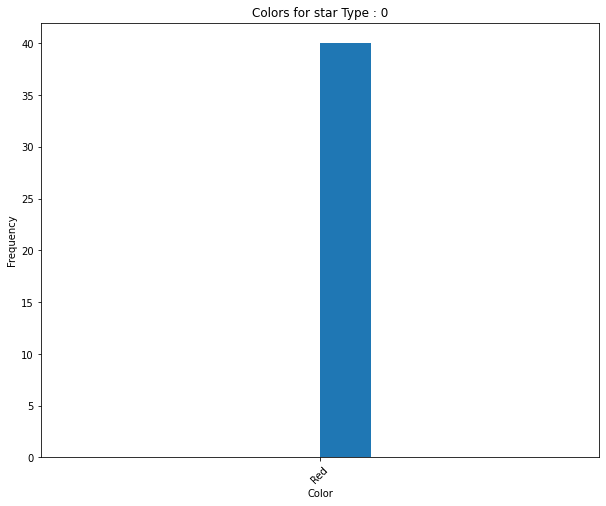

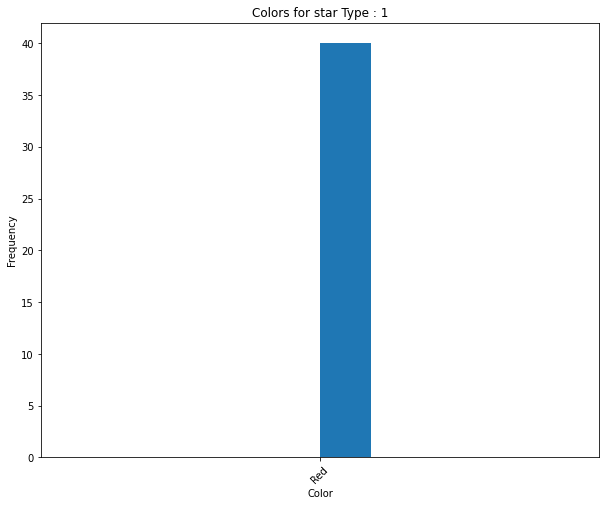

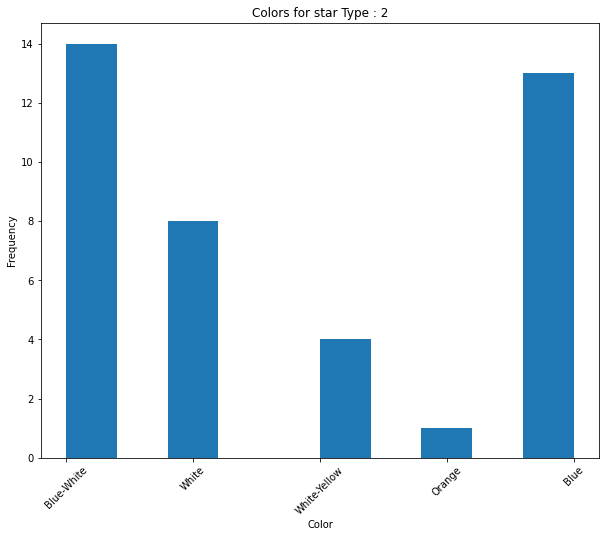

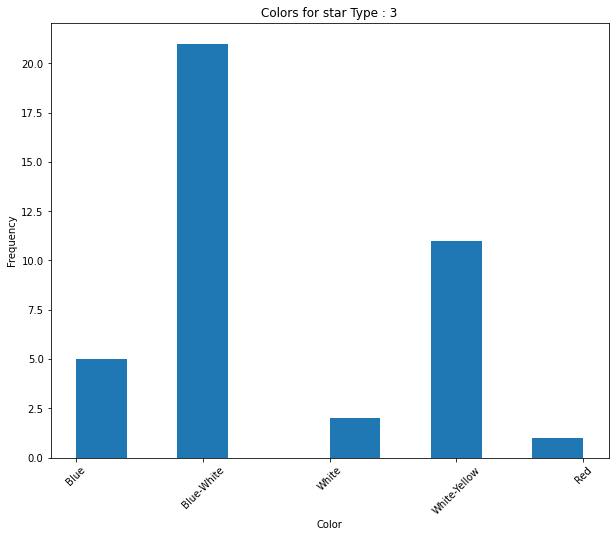

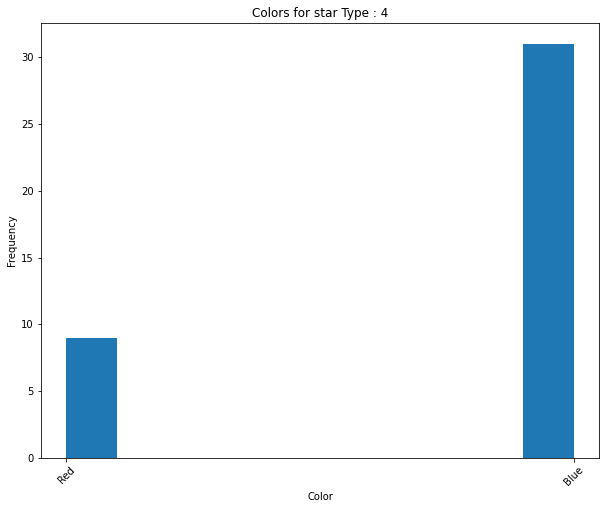

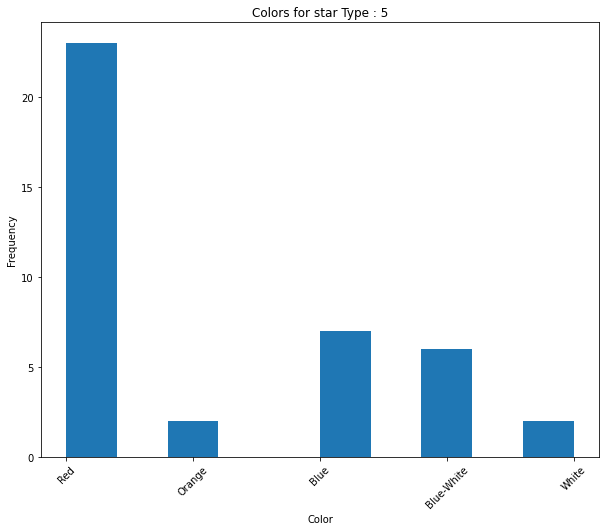

In [27]:
for index, star_type in enumerate(star_type_df):
  plt.figure(figsize = (10,8))
  plt.hist(star_type['Color'], 
           bins = 10)
  plt.title('Colors for star Type : '+ star_type_names_df[index])
  plt.xlabel('Color')
  plt.ylabel('Frequency')
  plt.xticks(rotation = 45)

  plt.show()

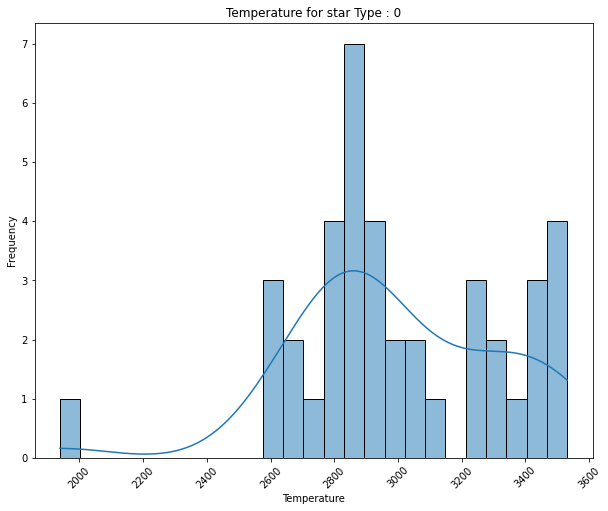

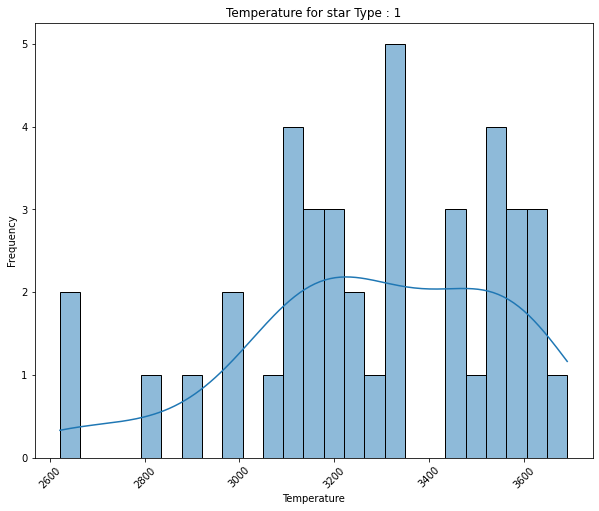

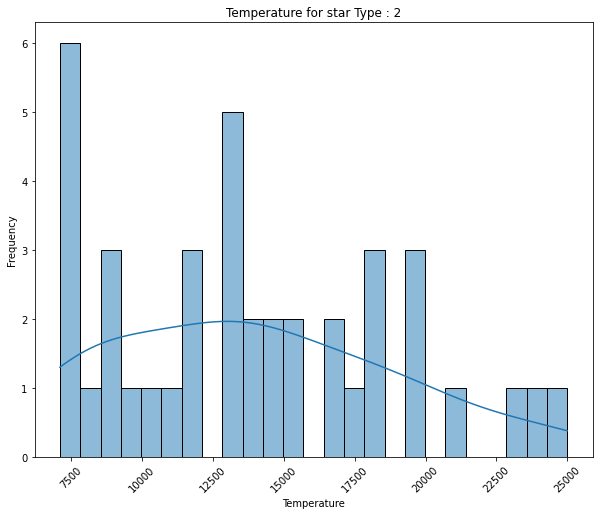

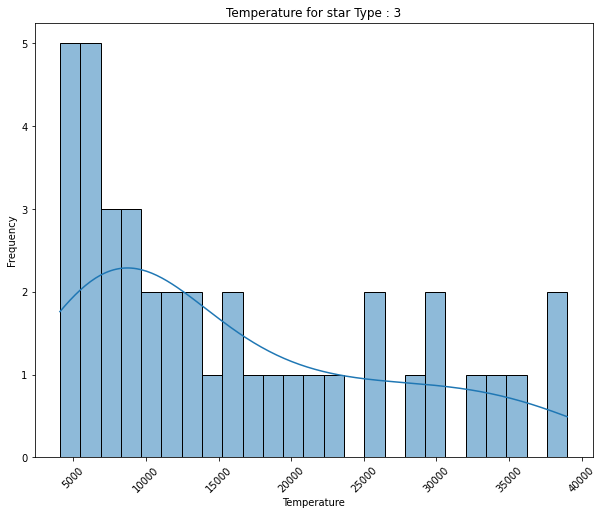

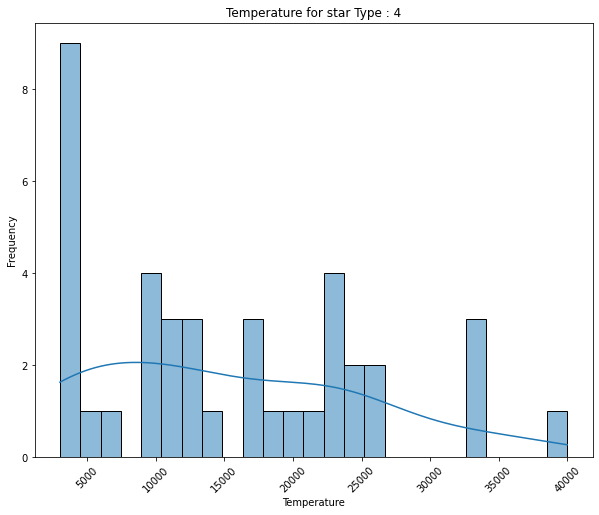

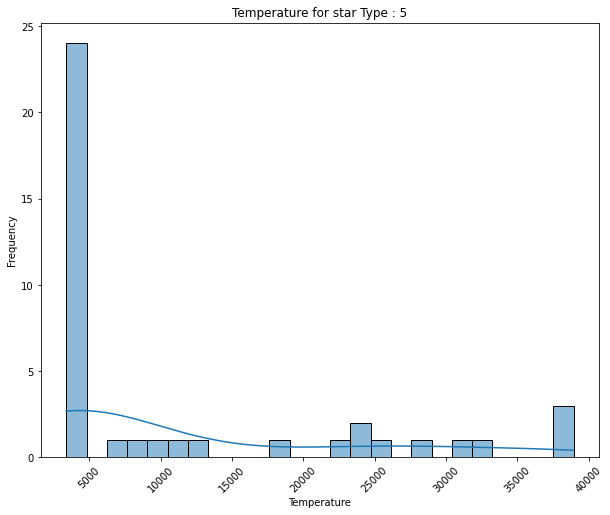

In [28]:
for index, star_type in enumerate(star_type_df):
  plt.figure(figsize = (10,8))
  sns.histplot(star_type['Temperature'], 
           bins = 25, kde = True)
  plt.title('Temperature for star Type : '+ star_type_names_df[index])
  plt.xlabel('Temperature')
  plt.ylabel('Frequency')
  plt.xticks(rotation = 45)

  plt.show()

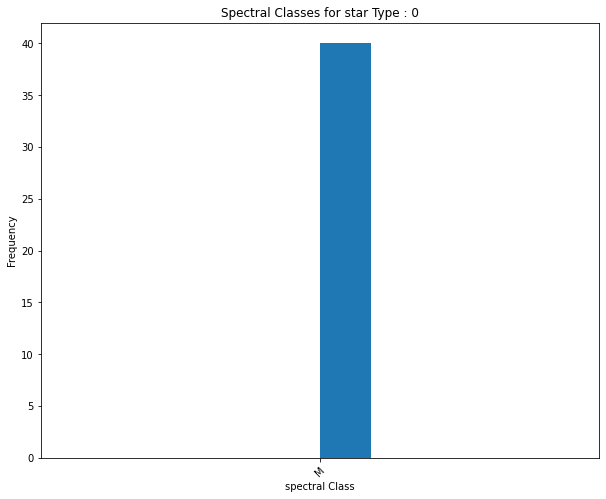

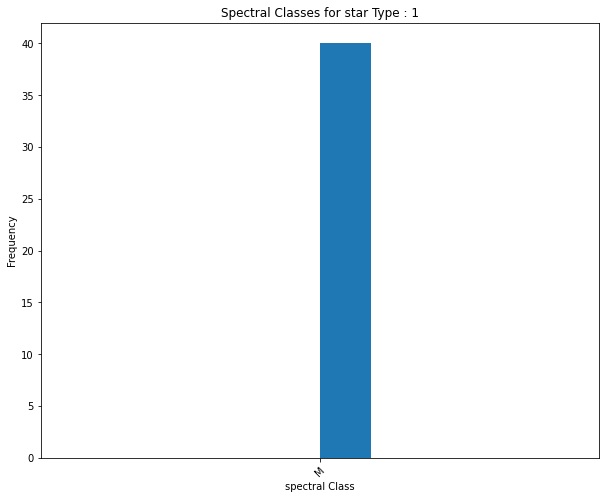

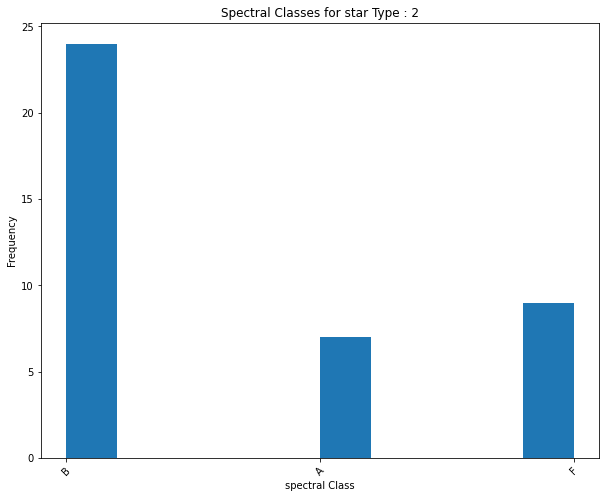

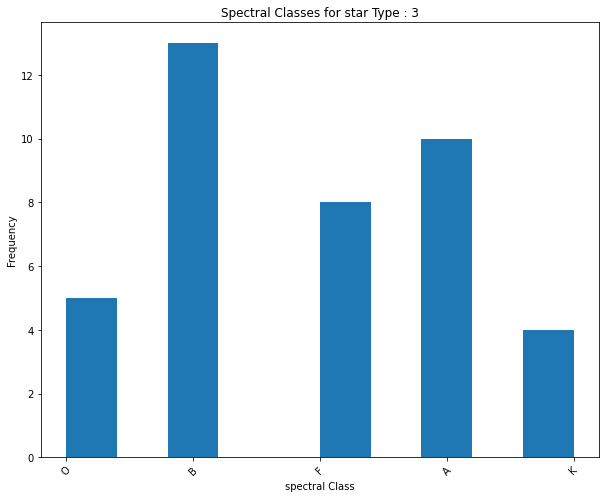

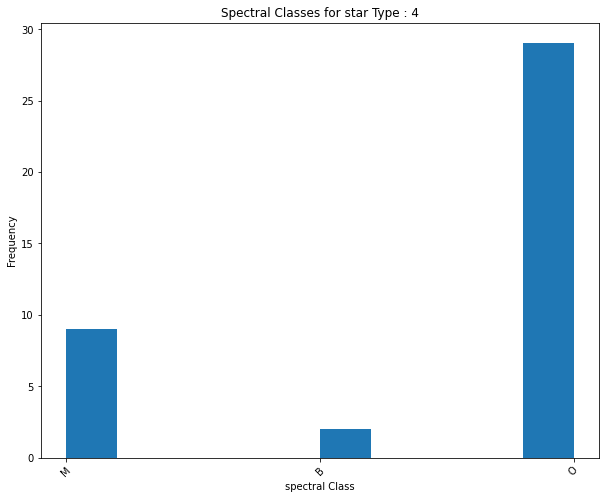

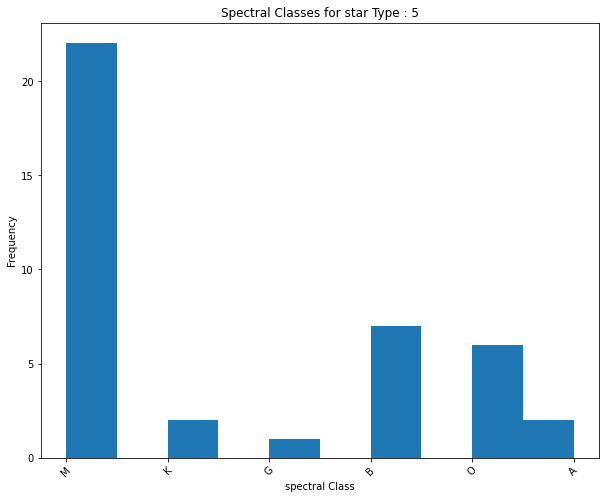

In [29]:
for index, star_type in enumerate(star_type_df):
  plt.figure(figsize = (10,8))
  plt.hist(star_type['Spectral_Class'])
  plt.title('Spectral Classes for star Type : '+ star_type_names_df[index])
  plt.xlabel('spectral Class')
  plt.ylabel('Frequency')
  plt.xticks(rotation = 45)

  plt.show()

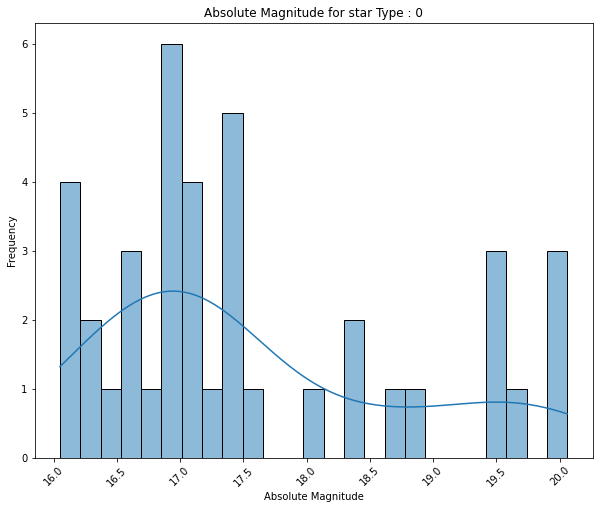

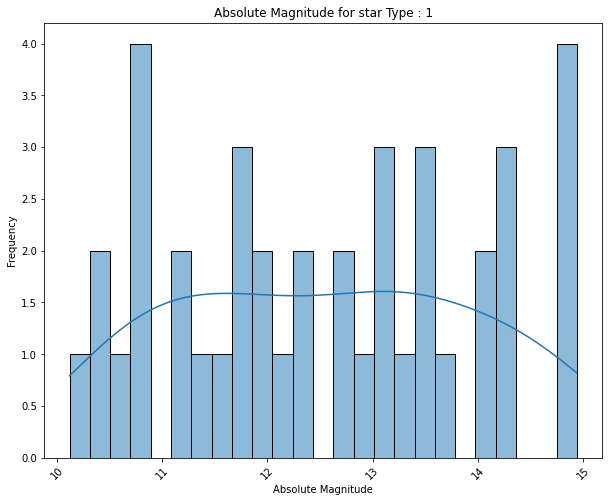

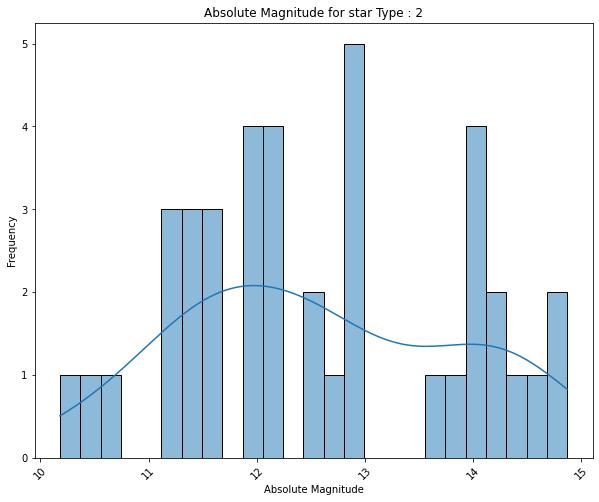

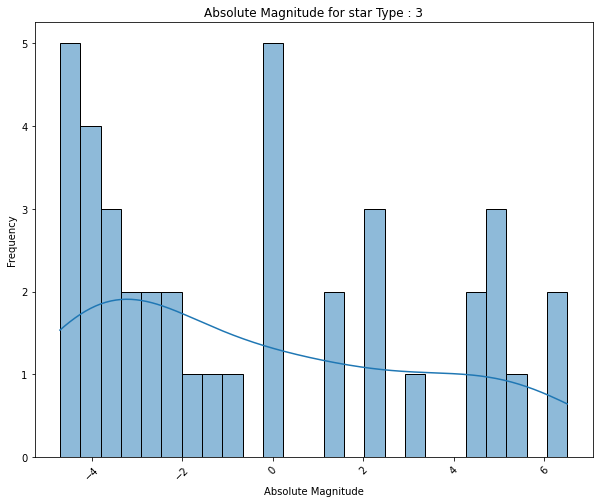

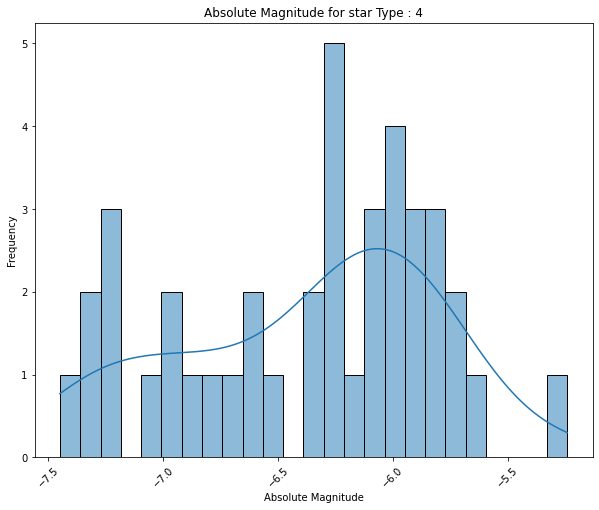

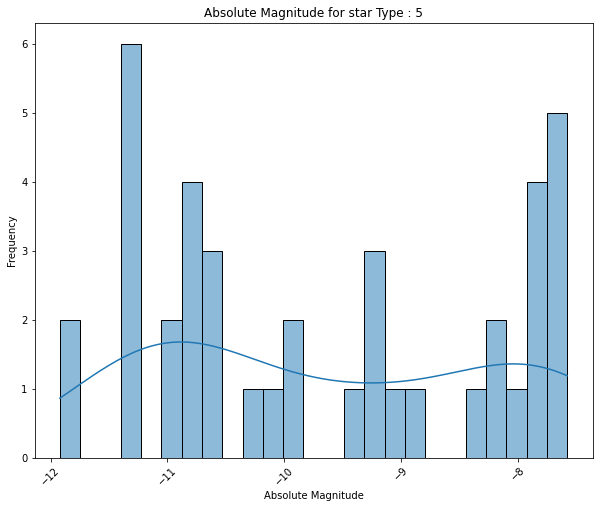

In [30]:
for index, star_type in enumerate(star_type_df):
  plt.figure(figsize = (10,8))
  sns.histplot(star_type['A_M'], 
           bins = 25,
           kde = True)
  plt.title('Absolute Magnitude for star Type : '+ star_type_names_df[index])
  plt.xlabel('Absolute Magnitude')
  plt.ylabel('Frequency')
  plt.xticks(rotation = 45)

  plt.show()

In [31]:
stars_ohe = pd.get_dummies(data = stars, columns = ['Color', 'Spectral_Class'], drop_first= True)
stars_ohe

,Temperature,L,R,A_M,Type,Color_Blue-White,Color_Orange,Color_Red,Color_White,Color_White-Yellow,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
Index,,,,,,,,,,,,,,,,
0,3068,0.002400,0.1700,16.12,0,0,0,1,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,1,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,1,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,1,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,0,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,0,0,0,1,0,0,0,0,0,0,0


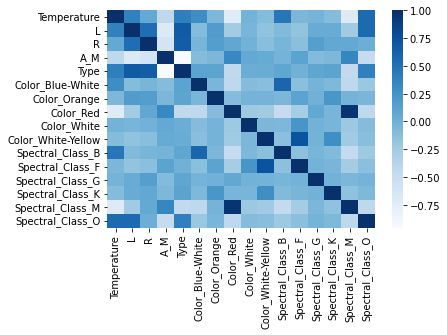

In [32]:
sns.heatmap(stars_ohe.corr(), 
            cmap = 'Blues')

Text(50.09374999999999, 0.5, 'Features')

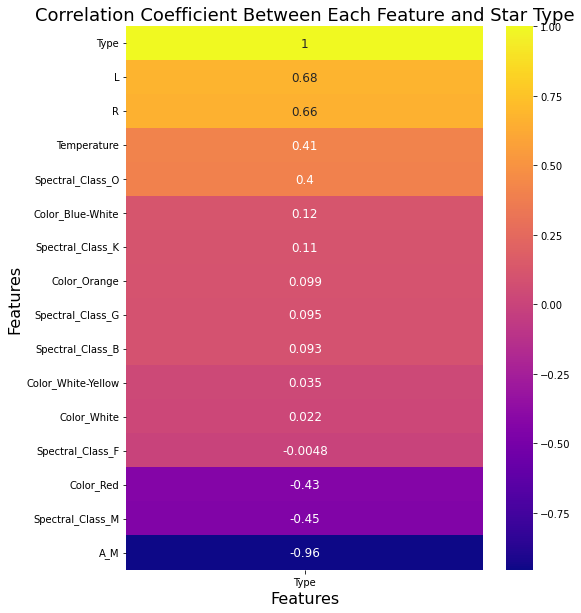

In [33]:
 # Visualizing correlation coefficients between features and target variable:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(stars_ohe.corr()[['Type']].sort_values('Type', ascending=False), annot = True, annot_kws= {"size":12}, cmap='plasma')
ax.set_title('Correlation Coefficient Between Each Feature and Star Type', fontsize=18) 
ax.set_xlabel('Features', fontsize = 16) 
ax.set_ylabel('Features', fontsize = 16) 
#ax.tick_params(axis = "both", labelsize = 12)

In [34]:
scaler = StandardScaler()

In [35]:
stars_ohe_scaled = scaler.fit(stars_ohe.drop('Type', axis = 1))
stars_ohe_scaled = scaler.transform(stars_ohe.drop('Type', axis = 1))

In [36]:
X = pd.DataFrame(stars_ohe_scaled, columns = stars_ohe.columns[:-1])
Y = stars_ohe['Type']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.33)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

In [37]:
model_knn_1 = KNeighborsClassifier(n_neighbors= 1)

In [38]:
model_knn_5 = KNeighborsClassifier(n_neighbors= 10)

In [39]:
model_knn_1.fit(X_train, Y_train)
model_knn_5.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
predict_knn_1 = model_knn_1.predict(X_test)
predict_knn_5 = model_knn_5.predict(X_test)

print(predict_knn_1)
print(predict_knn_5)

[2 0 3 3 4 5 5 2 0 2 4 2 5 4 5 5 0 1 3 0 0 1 5 3 4 3 1 2 5 3 5 4 2 0 1 0 1
 5 1 5 4 5 4 1 3 0 4 3 1 0 2 0 2 1 4 2 5 3 1 1 3 0 0 0 4 0 4 2 5 1 5 5 2 0
 1 2 0 5 4 3]
[2 0 3 4 4 5 3 2 0 2 4 2 5 4 5 3 0 1 3 0 0 1 4 4 4 3 1 2 2 3 1 4 3 0 1 0 1
 5 1 5 4 5 4 1 3 0 4 3 1 0 2 0 2 1 4 2 5 3 1 1 3 0 0 0 4 0 4 2 5 1 3 5 2 0
 1 2 0 5 4 4]


In [41]:
print(confusion_matrix(Y_test, predict_knn_1))
print(confusion_matrix(Y_test, predict_knn_5))

[[16  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 10  0  1]
 [ 0  0  0  1 11  0]
 [ 0  0  0  0  1 15]]
[[16  0  0  0  0  0]
 [ 0 13  0  0  0  0]
 [ 0  0 11  1  0  0]
 [ 0  1  0  8  2  0]
 [ 0  0  0  0 12  0]
 [ 0  0  1  3  2 10]]


In [42]:
print(classification_report(Y_test,predict_knn_1))
print(classification_report(Y_test,predict_knn_5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12
           3       0.91      0.91      0.91        11
           4       0.92      0.92      0.92        12
           5       0.94      0.94      0.94        16

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.93      1.00      0.96        13
           2       0.92      0.92      0.92        12
           3       0.67      0.73      0.70        11
           4       0.75      1.00      0.86        12
           5       1.00      0.62      0.77        16

    accuracy                           0.88        80
   macro avg       0.88

Text(0, 0.5, 'Error Rate')

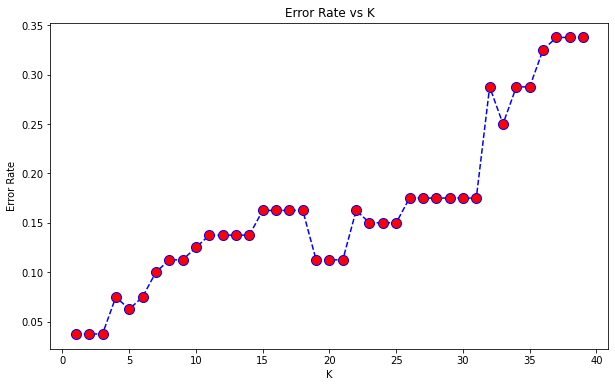

In [43]:
error_rate= []
for i in range(1,40):
    model_knn = KNeighborsClassifier(n_neighbors = i)
    model_knn.fit(X_train,Y_train)
    predict_knn_i = model_knn.predict(X_test)
    error_rate.append(np.mean(predict_knn_i != Y_test))
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [44]:
print(model_knn_5.score(X_test, Y_test))

0.875


[0.95833333 0.95833333 0.875      1.         0.91666667 1.
 0.95833333 0.95833333 1.         0.91666667]
0.9541666666666666


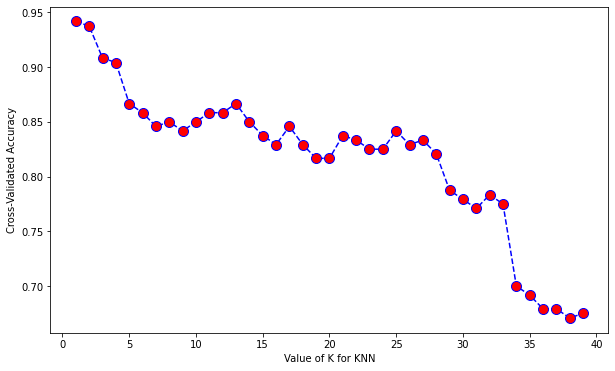

In [45]:
cv_scores = cross_val_score(model_knn_1, X, Y, cv = 10, scoring = 'accuracy')
print(cv_scores)

avg_cv_scores = np.mean(cv_scores)
print(avg_cv_scores)

# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# plot to see clearly
plt.figure(figsize = (10,6))
plt.plot(k_range, k_scores, color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [46]:
params={'n_neighbors': range(1,40)}
params

model_knn_grid = GridSearchCV(KNeighborsClassifier(), params, cv=10, scoring='accuracy')
model_knn_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)}, scoring='accuracy')

print(model_knn_grid.best_estimator_)
print(model_knn_grid.best_score_)


KNeighborsClassifier(n_neighbors=1)
0.975
